In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('./data/cheap_train_sample.csv', skipinitialspace = True)

In [12]:
df_old = pd.read_csv('./data/cheap_train_sample.csv', skipinitialspace = True)

In [3]:
df_real = pd.read_csv('./data/large_train_sample.csv', skipinitialspace = True)

In [4]:
def cleaning(dataframe):
    dataframe['wage'] = dataframe['wage'].replace(to_replace={'<=50K': 0, '>50K': 1})
    dataframe['occupation'] = dataframe['occupation'].replace(to_replace={'?':np.nan})
    dataframe['native-country'] = dataframe['native-country'].replace(to_replace={'?' : dataframe['native-country'].mode()[0]})
    dataframe['workclass'] = dataframe['workclass'].replace(to_replace={'?' : dataframe['workclass'].mode()[0]})
    dataframe.drop(columns='education', inplace=True)
    dataframe = pd.get_dummies(dataframe
               ,columns = ['sex', 'marital-status', 'occupation', 'relationship', 'native-country', 'workclass']
               ,drop_first = True
               )

    return dataframe

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [6]:
df2 = cleaning(df)

In [7]:
df2

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,sex_Male,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,56,346033,5,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,28,96226,9,0,0,45,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,33,251120,13,7688,0,50,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,26,178140,13,0,0,45,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,40,56795,14,14084,0,55,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,29,198997,9,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6509,17,46496,7,0,0,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6510,31,381153,10,15024,0,56,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
6511,35,385412,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [8]:
def chart_instances(feature):
    return df[feature].value_counts().sort_values(ascending = False).head(20).plot(kind='barh',
                                                                            ylabel = feature,
                                                                            color = 'green')

<AxesSubplot:ylabel='occupation'>

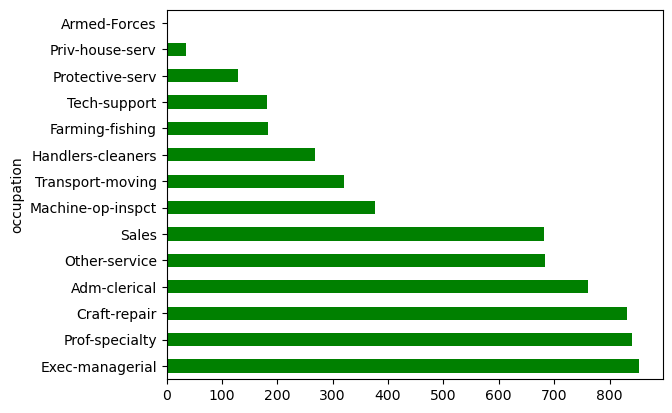

In [9]:
chart_instances('occupation')

In [13]:
df_old['education'] = df_old['education'].replace(to_replace={'9th':'some-HS'})
df_old['education'] = df_old['education'].replace(to_replace={'10th':'some-HS'})
df_old['education'] = df_old['education'].replace(to_replace={'11th':'some-HS'})
df_old['education'] = df_old['education'].replace(to_replace={'12th':'some-HS'})
df_old['education'] = df_old['education'].replace(to_replace={'7th-8th':'some-MS'})
df_old['education'] = df_old['education'].replace(to_replace={'5th-6th':'some-MS'})
df_old['education'] = df_old['education'].replace(to_replace={'1st-4th':'some-ES'})

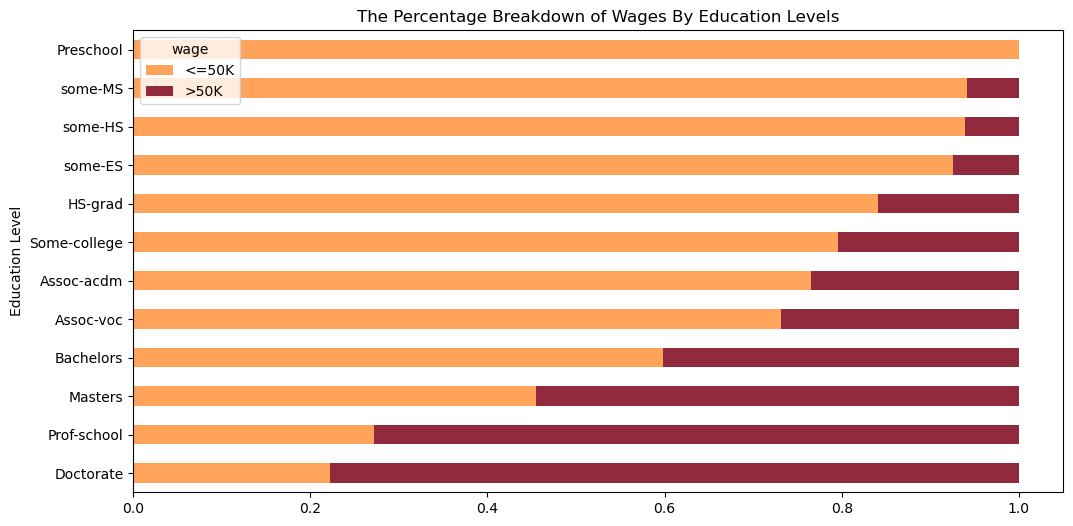

In [19]:
education_wage = df_old.groupby('education')['wage'].value_counts(normalize = True).unstack(1)
education_wage_50 = education_wage.sort_values(by = '<=50K')

education_wage_50.plot(kind = 'barh', color = ('#ffa35a', '#912a3c'), 
                    stacked = True, title = 'The Percentage Breakdown of Wages By Education Levels',
                    figsize = (12, 6), ylabel='Percentage (%)', xlabel='Education Level'
                       );

In [22]:
mar_wage = df.groupby('marital')['wage'].value_counts(normalize = True).unstack(1)
occupation_wage_50 = occupation_wage.sort_values(by = '<=50K')

occupation_wage_50.plot(kind = 'bar', color = ('#ffa35a', '#912a3c'), 
                    stacked = True, title = 'The Percentage Breakdown of Wages By Occupation',
                    figsize = (12, 6), ylabel='Percentage (%)', xlabel='Occupation', rot = 40
                       );

NameError: name 'occupation_wage' is not defined

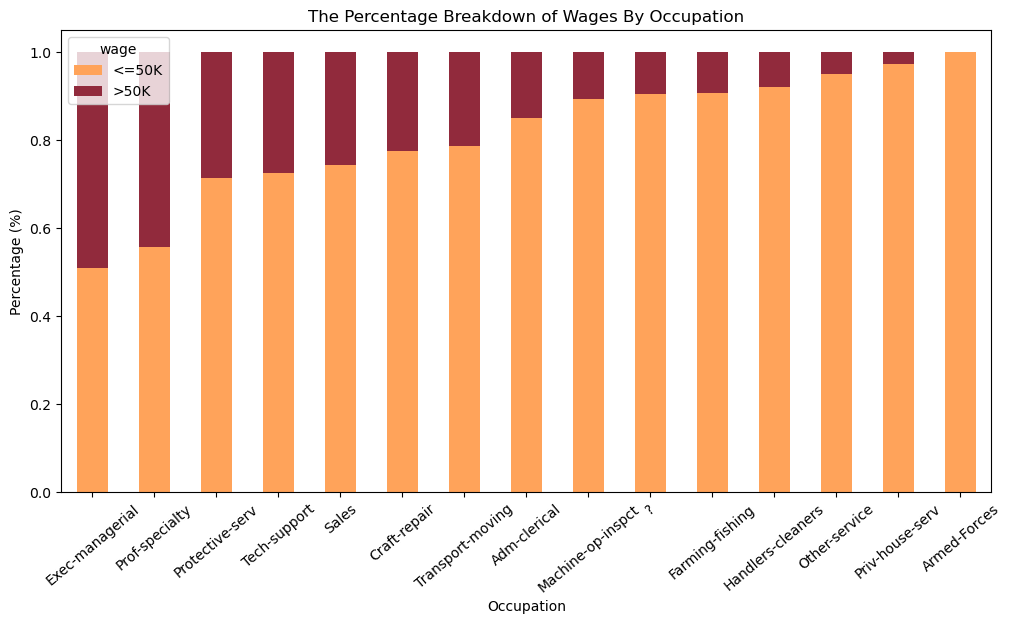

In [522]:
occupation_wage = df.groupby('occupation')['wage'].value_counts(normalize = True).unstack(1)
occupation_wage_50 = occupation_wage.sort_values(by = '<=50K')

occupation_wage_50.plot(kind = 'bar', color = ('#ffa35a', '#912a3c'), 
                    stacked = True, title = 'The Percentage Breakdown of Wages By Occupation',
                    figsize = (12, 6), ylabel='Percentage (%)', xlabel='Occupation', rot = 40
                       );

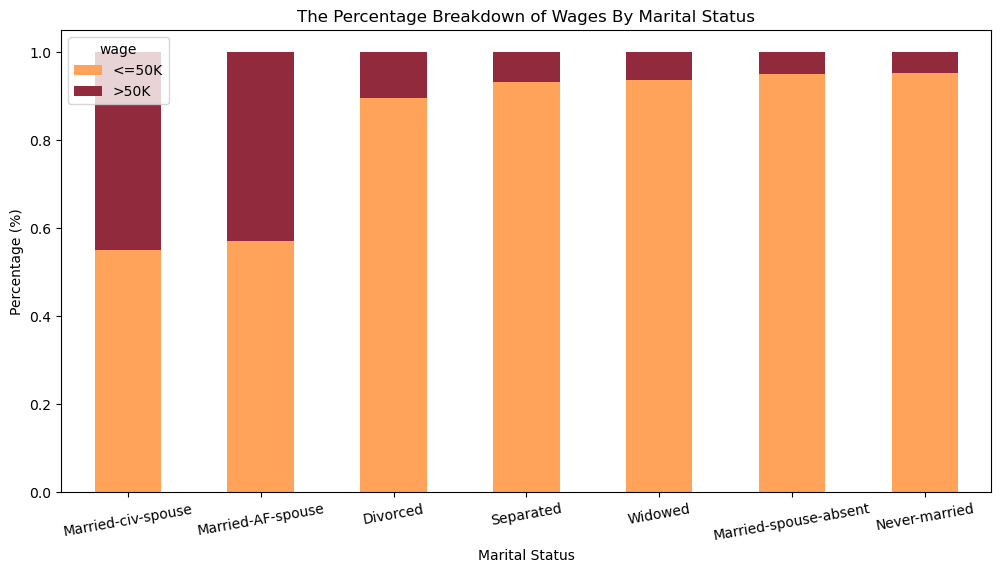

In [512]:
marital_status_wage = df.groupby('marital-status')['wage'].value_counts(normalize = True).unstack(1)
marital_status_wage_50 = education_wage.sort_values(by = '<=50K')

marital_status_wage_50.plot(kind = 'bar', color = ('#ffa35a', '#912a3c'), 
                    stacked = True, title = 'The Percentage Breakdown of Wages By Marital Status',
                    figsize = (12, 6), xlabel = 'Marital Status', ylabel='Percentage (%)', rot = 10);

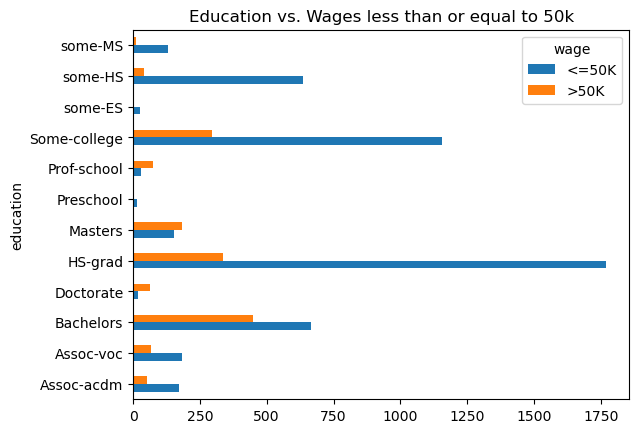

In [437]:
df.groupby('wage')['education'].value_counts().unstack(0).plot(kind = 'barh',
                                                               title = 'Education vs. Wages less than or equal to 50k');
# .loc[data_useless['TEST_STATUS'] == 'PASS TEST']   

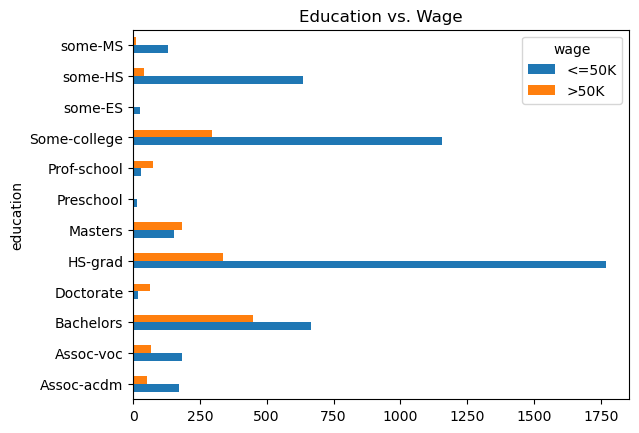

In [ ]:
df

# Bootstrapping

In [341]:
from sklearn.utils import resample

In [342]:
newdf = resample(df, replace = True, n_samples = 200000, random_state=2023)

In [ ]:
newdf = resample(df[df['wage'] == 1], replace = True, n_samples = 3200, random_state=2023)

 df  = pd.concat([df, newdf])

f_df = resample(df, replace = True, n_samples = 30000, random_state=2023)

In [ ]:
df = pd.concat([df, f_df])

In [435]:
def grid_custom(dataframe, model, params):

    X = dataframe.drop(columns = 'wage')
    y = dataframe['wage']
    print(f"Your data's baseline is: {y.value_counts(normalize = True)}")

    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2023)
    if model == 'knn':
        pipe = Pipeline([
        ('sc', StandardScaler()),
        ('kn', KNeighborsClassifier())
        ])
        
    elif model == 'lg':
        pipe = Pipeline([
        ('sc', StandardScaler()),
        ('lg', LogisticRegression())
        ])
        
    elif model == 'svc':
        pipe = Pipeline([
        ('sc', StandardScaler()),
        ('svc', SVC())
        ])

    gs = GridSearchCV(pipe,
              param_grid = params,
              n_jobs = 6,
              cv = 5)
    gs.fit(X_train, y_train)
    print(f"The best CVEC Grid Search Parameters are: {gs.best_params_}")
    print(f"CVEC Training score: {gs.score(X_train, y_train)}")
    print(f"CVEC Test score: {gs.score(X_test, y_test)}")

    #Calculating Scores
    preds = gs.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    print(f"Specificity: {tn / (tn + fp)}")
    print(f"Accuracy: {(tn + tp) / (tn + fn + tp + fp)}")
    print(f"Precision: {tp / (tp + fp)}")
    print(f"Sensitivity: {tp / (tn + tp)}")
    print(plot_confusion_matrix(gs, X_test, y_test, cmap='viridis', values_format='d'))

    return gs.best_params_

In [436]:
#Define hyperparameters for each pipeline to gridsearch over
# Logistic Regression Hyperparameters
hp_lr = {'clf__penalty': ['l2'], # Tested parameters:
         'clf__C': [3]} # Tested parameters:

# Random Forest Hyperparameters
hp_rf = {'clf__n_estimators': [300], # Tested parameters:
         'clf__max_depth': [22]} # Tested parameters:

# Extra Trees Hyperparameters
hp_et = {'clf__n_estimators': [1000], # Tested parameters:
         'clf__max_depth': [18]} # Tested parameters:

# Gradient Boosting Hyperparameters
hp_gb = {'clf__n_estimators': [1000], # Tested parameters: 
         'clf__max_depth': [3], # Tested parameters:
         'clf__learning_rate': [0.1]} # Tested parameters:

# SVM (Support Vector Machine) Hyperparameters
hp_svc = {'clf__C': [1], # Tested parameters:
         'clf__kernel': ['rbf']} # Tested parameters: 

# Combine hyperparameters into a list of hyperparameters
hps = [hp_lr,
       hp_rf,
       hp_et,
       hp_gb,
       hp_xg,
       hp_svc]

NameError: name 'hp_xg' is not defined